Olivia Arroyo

IS 680

Final Project

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
songs <- read_csv('/content/spotify-2023.csv')

Rows: 953 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): track_name, artist(s)_name, streams, key, mode
dbl (17): artist_count, released_year, released_month, released_day, in_spot...
num  (2): in_deezer_playlists, in_shazam_charts

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
#Review the data
glimpse(songs)

Rows: 953
Columns: 24
$ track_name           <chr> "Seven (feat. Latto) (Explicit Ver.)", "LALA", "v…
$ `artist(s)_name`     <chr> "Latto, Jung Kook", "Myke Towers", "Olivia Rodrig…
$ artist_count         <dbl> 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1…
$ released_year        <dbl> 2023, 2023, 2023, 2019, 2023, 2023, 2023, 2023, 2…
$ released_month       <dbl> 7, 3, 6, 8, 5, 6, 3, 7, 5, 3, 4, 7, 1, 4, 3, 12, …
$ released_day         <dbl> 14, 23, 30, 23, 18, 1, 16, 7, 15, 17, 17, 7, 12, …
$ in_spotify_playlists <dbl> 553, 1474, 1397, 7858, 3133, 2186, 3090, 714, 109…
$ in_spotify_charts    <dbl> 147, 48, 113, 100, 50, 91, 50, 43, 83, 44, 40, 55…
$ streams              <chr> "141381703", "133716286", "140003974", "800840817…
$ in_apple_playlists   <dbl> 43, 48, 94, 116, 84, 67, 34, 25, 60, 49, 41, 37, …
$ in_apple_charts      <dbl> 263, 126, 207, 207, 133, 213, 222, 89, 210, 110, …
$ in_deezer_playlists  <dbl> 45, 58, 91, 125, 87, 88, 43, 30, 48, 66, 54, 21, …
$ in_deezer_charts

In [4]:
duplicated(songs)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[601] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[613] FALSE FALSE FALSE 

In [5]:
songs <- songs %>%
  mutate(streams = as.double(streams))

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `streams = as.double(streams)`.
Caused by warning:
! NAs introduced by coercion”


In [6]:
glimpse(songs$streams)

 num [1:953] 1.41e+08 1.34e+08 1.40e+08 8.01e+08 3.03e+08 ...


In [7]:
summary(songs)

  track_name        artist(s)_name      artist_count   released_year 
 Length:953         Length:953         Min.   :1.000   Min.   :1930  
 Class :character   Class :character   1st Qu.:1.000   1st Qu.:2020  
 Mode  :character   Mode  :character   Median :1.000   Median :2022  
                                       Mean   :1.556   Mean   :2018  
                                       3rd Qu.:2.000   3rd Qu.:2022  
                                       Max.   :8.000   Max.   :2023  
                                                                     
 released_month    released_day   in_spotify_playlists in_spotify_charts
 Min.   : 1.000   Min.   : 1.00   Min.   :   31        Min.   :  0.00   
 1st Qu.: 3.000   1st Qu.: 6.00   1st Qu.:  875        1st Qu.:  0.00   
 Median : 6.000   Median :13.00   Median : 2224        Median :  3.00   
 Mean   : 6.034   Mean   :13.93   Mean   : 5200        Mean   : 12.01   
 3rd Qu.: 9.000   3rd Qu.:22.00   3rd Qu.: 5542        3rd Qu.: 16.00   
 M

In [8]:
songs <- na.omit(songs)
songs

track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,⋯,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,⋯,125,B,Major,80,89,83,31,0,8,4
LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,⋯,92,C#,Major,71,61,74,7,0,10,4
vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,⋯,138,F,Major,51,32,53,17,0,31,6
Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,⋯,170,A,Major,55,58,72,11,0,11,15
WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,⋯,144,A,Minor,65,23,80,14,63,11,6
Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,⋯,141,C#,Major,92,66,58,19,0,8,24
Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,⋯,148,F,Minor,67,83,76,48,0,8,3
Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,⋯,100,F,Major,67,26,71,37,0,11,4
fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,⋯,130,C#,Minor,85,22,62,12,0,28,9


In [9]:
summary(songs)

  track_name        artist(s)_name      artist_count   released_year 
 Length:816         Length:816         Min.   :1.000   Min.   :1930  
 Class :character   Class :character   1st Qu.:1.000   1st Qu.:2021  
 Mode  :character   Mode  :character   Median :1.000   Median :2022  
                                       Mean   :1.569   Mean   :2019  
                                       3rd Qu.:2.000   3rd Qu.:2022  
                                       Max.   :8.000   Max.   :2023  
 released_month    released_day   in_spotify_playlists in_spotify_charts
 Min.   : 1.000   Min.   : 1.00   Min.   :   31        Min.   :  0.00   
 1st Qu.: 3.000   1st Qu.: 5.00   1st Qu.:  829        1st Qu.:  0.00   
 Median : 5.000   Median :13.00   Median : 2038        Median :  3.00   
 Mean   : 6.025   Mean   :13.71   Mean   : 4852        Mean   : 11.74   
 3rd Qu.: 9.000   3rd Qu.:22.00   3rd Qu.: 4891        3rd Qu.: 16.00   
 Max.   :12.000   Max.   :31.00   Max.   :52898        Max.   :147.00   

In [10]:
mean(songs$streams)
median(songs$streams)
sd(songs$streams)

[1] 468985764

[1] 263836780

[1] 523126748

In [11]:
mean(songs$in_spotify_charts)
median(songs$in_spotify_charts)
sd(songs$in_spotify_charts)

[1] 11.73652

[1] 3

[1] 18.62456

In [12]:
mean(songs$in_shazam_charts)
median(songs$in_shazam_charts)
sd(songs$in_shazam_charts)

[1] 57.62255

[1] 3

[1] 153.6163

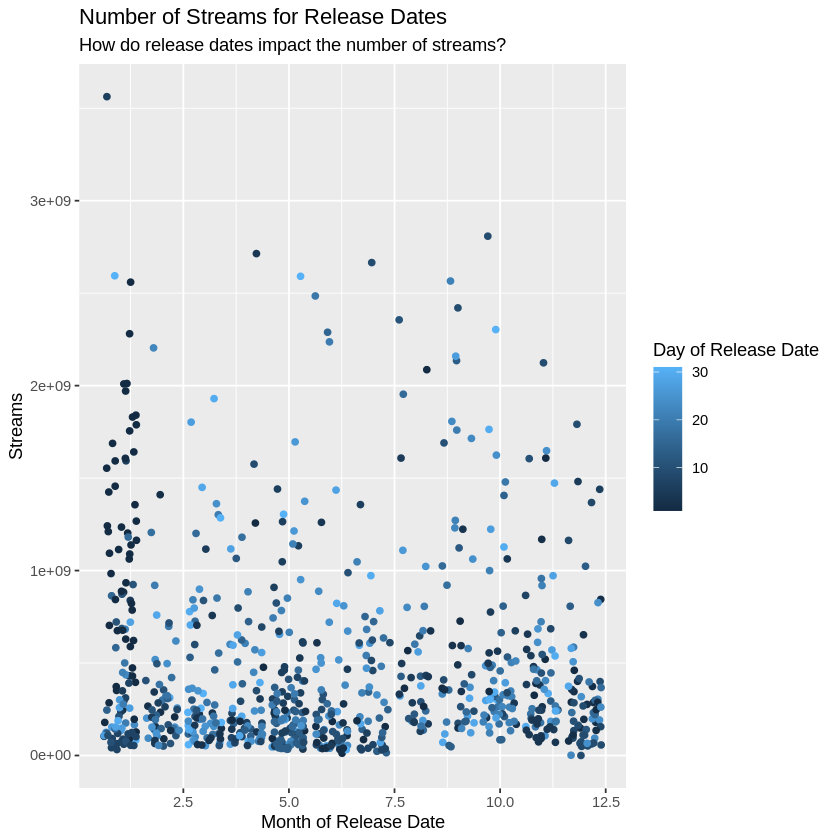

In [13]:
ggplot(data = songs, aes(x = released_month, color = released_day)) +
  geom_jitter(aes(y = streams)) +
  labs(
    x = "Month of Release Date",
    y = "Streams",
    title = "Number of Streams for Release Dates",
    subtitle = "How do release dates impact the number of streams?",
    color = "Day of Release Date"
  )



In [14]:
ggsave("myplot1.png", plot = p1)

Saving 6.67 x 6.67 in image


ERROR: ignored

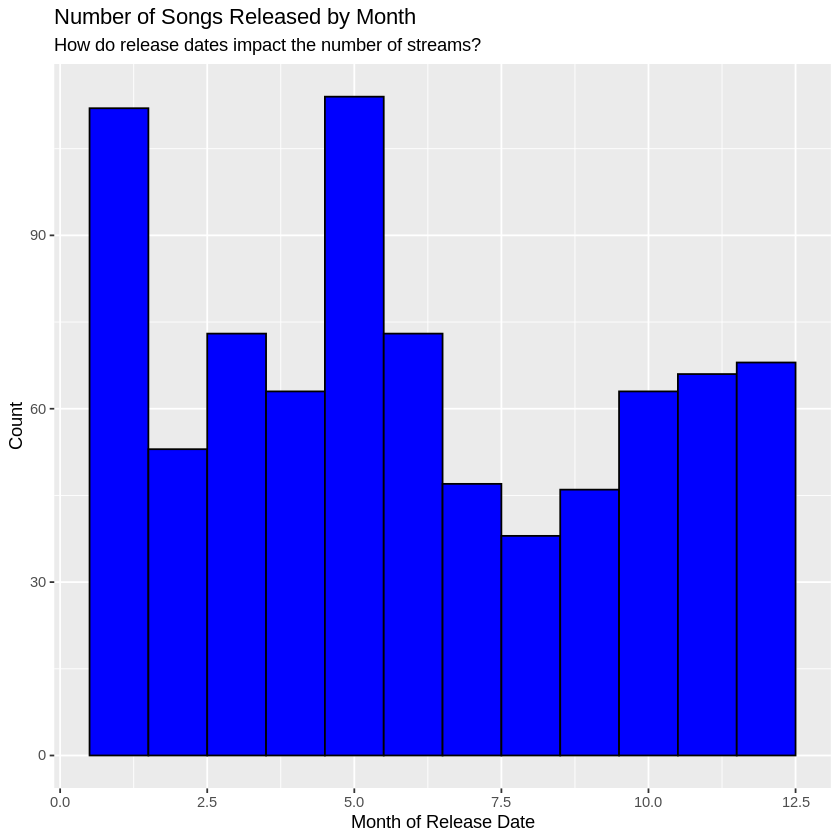

In [15]:
ggplot(data = songs, aes(x = released_month)) +
  geom_histogram(bins = 12, color = "black", fill = "blue") +
  labs(
    x = "Month of Release Date",
    y = "Count",
    title = "Number of Songs Released by Month",
    subtitle = "How do release dates impact the number of streams?",

  )

In [16]:
danceability_perc <- songs$'danceability_%'

In [17]:
p4 <- ggplot(data = songs, aes(x = danceability_perc)) +
  geom_point(aes(y = streams)) +
  labs(
    x = "Danceability",
    y = "Streams",
    title = "Number of Streams Based on Danceability",
    subtitle = "Is there a correlation between danceability percentage and streams?"
  )
ggsave("danceability.png", plot = p4)

Saving 6.67 x 6.67 in image


In [18]:
speechiness <- songs$'speechiness_%'

In [50]:
p6 <- ggplot(data = songs, aes(x = speechiness)) +
  geom_point(aes(y = in_shazam_charts, color = 336699), show.legend = FALSE) +
  labs(
    x = "Speechiness",
    y = "Rank in Shazam Charts",
    title = "Speechiness ",
    subtitle = "Is there a correlation between speechiness and rank in the Shazam Charts?"
  )

ggsave("speechiness.png", plot = p6)

Saving 6.67 x 6.67 in image


In [19]:
acousticness <- songs$'acousticness_%'
instrumentalness <- songs$'instrumentalness_%'
liveness <- songs$'liveness_%'

In [20]:
acoustic <- ggplot(data = songs, aes(x = acousticness, fill = 33333)) +
  geom_density(show.legend = FALSE) +
  labs(
    x = "Acousticness",
    y = "Density",
    title = "Acousticness Density in Top Songs"
  )
ggsave("acoustic.png", plot = acoustic)

Saving 6.67 x 6.67 in image


In [21]:
instrumental <- ggplot(data = songs, aes(x = instrumentalness, fill = 33333)) +
  geom_density(show.legend = FALSE) +
  labs(
    x = "Instrumentalness",
    y = "Density",
    title = "Instrumentalness in Top Songs"
  )
ggsave("instrument.png", plot = instrumental)

Saving 6.67 x 6.67 in image


In [22]:
live <- ggplot(data = songs, aes(x = liveness, fill = 33333)) +
  geom_density(show.legend = FALSE) +
  labs(
    x = "Liveness",
    y = "Density",
    title = "Liveness Percentage in Top Songs"
  )
ggsave("liveness.png", plot = live)

Saving 6.67 x 6.67 in image
